<a href="https://colab.research.google.com/github/rajumark/QuantitativeLearning/blob/main/Restaurant_Tips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Restaurant Tips Analysis
# Goal : learn seaborn library and analysis based on bill and tips values
# For data we will plot data in charts and tried to find relationship between
# that will help us to take confident business dicision.

In [71]:
!pip install seaborn
#This lib will provide really good datas that we need for analysis

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from library to variable
tips=sns.load_dataset("tips")
print(tips.head())
# Here we can see data inside dataset
# Without further a do let's just plot it brindly 2 things total bill and tips (even not exploring further colums in lib)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Business Questions to Answer

## 1. Customer & Tip Behavior
- **What is the average tip overall?**  
- **What is the average tip by gender?**  
- **What is the average tip by smoker vs non-smoker?**  
- **What is the average tip by day (Sun, Sat, etc.)?**  
- **How does tip amount vary with party size?**  

**Visualizations to try:** bar charts, boxplots, scatter plots

---

## 2. Bill Analysis
- **What is the average total bill overall?**  
- **What is the average bill by gender?**  
- **Which day has the highest total bill?**  
- **Does smoker vs non-smoker spend more on average?**  
- **How does bill amount relate to tip amount?** (scatter plot + correlation)

---

## 3. Time Analysis
- **Are tips higher at dinner or lunch?**  
- **Are bigger parties tipping more or less per person?**  
- **How does day of week + time affect tip or bill?**  

**Visualizations:** stacked bar charts, heatmaps

---

## 4. Profit & Business Decision Questions
- **If the restaurant wants to increase tips, which time of day, day, or customer type should they focus on?**  
- **Should the restaurant invest in lunch or dinner service to maximize tips?**  
- **Is there a correlation between bill size and tip percentage?**


Average tip overall = 2.99827868852459
---------
Average tip by sex : 
 - Male = 3.0896178343949043
 - Female = 2.8334482758620685
---------
Average tip by smoker : 
 - Do smoke = 2.9918543046357615
 - Do not smoke = 3.008709677419355
---------
Average tip by day : 
 - Sun = day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64
---------
Average tip by party size : size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


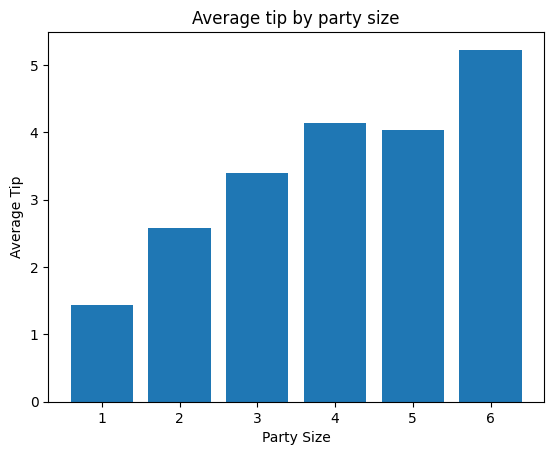

---------
Average bill amount overall = 2.99827868852459
---------
Average bill by sex : 
 - Male = 20.744076433121016
 - Female = 18.056896551724133
---------
Total bill by day : day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64


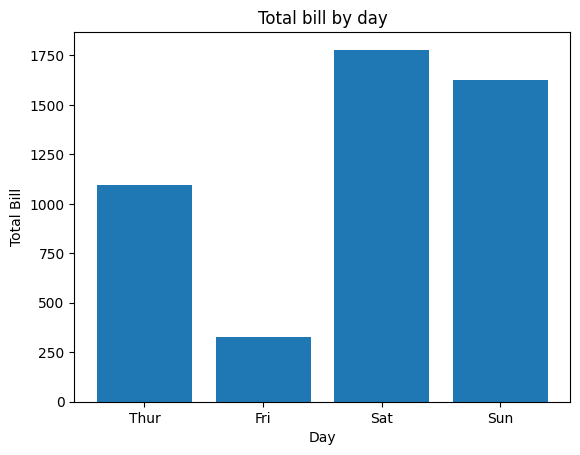

---------
Does smoker vs non-smoker spend more on average?
Total bill by smoker : smoker
Yes    1930.34
No     2897.43
Name: total_bill, dtype: float64


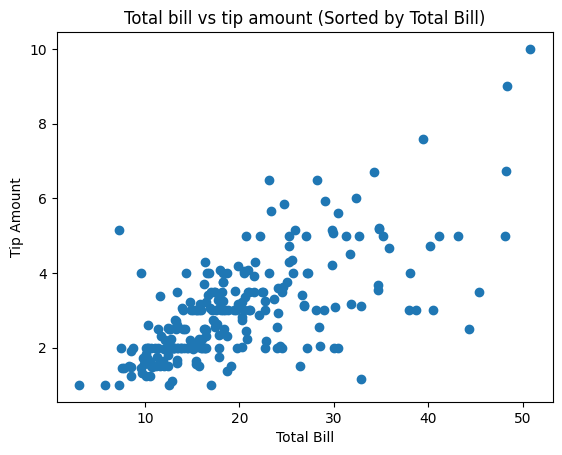

In [73]:
# Let's try to find business question based on data we have
# also we will perfom needed calulcations

average_tip_overall=tips['tip'].mean()
print("Average tip overall = "+ str(average_tip_overall))

print("---------")
male_tips=tips[tips['sex']=="Male"]
female_tips=tips[tips['sex']=="Female"]
print("Average tip by sex : "+"\n - Male = "+str(male_tips['tip'].mean()) + "\n - Female = "+str(female_tips['tip'].mean()))

print("---------")
smoker_tips=tips[tips['smoker']=="No"]
no_smoker_tips=tips[tips['smoker']=="Yes"]
print("Average tip by smoker : "+"\n - Do smoke = "+str(smoker_tips['tip'].mean()) + "\n - Do not smoke = "+str(no_smoker_tips['tip'].mean()))

print("---------")
day_tips=tips.groupby('day',observed=True)['tip'].mean()
print("Average tip by day : "+"\n - Sun = "+str(day_tips))

print("---------")
party_size_tips=tips.groupby('size',observed=True)['tip'].mean()
print("Average tip by party size : "+""+str(party_size_tips))
plt.bar(party_size_tips.index, party_size_tips.values)
plt.title("Average tip by party size")
plt.xlabel("Party Size")
plt.ylabel("Average Tip")
plt.show()

print("---------")
average_bill_overall=tips['total_bill'].mean()
print("Average bill amount overall = "+ str(average_tip_overall))

print("---------")
bill_by_sex_male=tips[tips['sex']=="Male"]['total_bill'].mean()
bill_by_sex_female=tips[tips['sex']=="Female"]['total_bill'].mean()
print("Average bill by sex : "+"\n - Male = "+str(bill_by_sex_male) + "\n - Female = "+str(bill_by_sex_female))

print("---------")
bill_by_day=tips.groupby('day',observed=True)['total_bill']
print("Total bill by day : "+""+str(bill_by_day.sum()))
plt.bar(bill_by_day.sum().index, bill_by_day.sum().values)
plt.title("Total bill by day")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.show()

print("---------")
bill_by_smoker=tips.groupby('smoker',observed=True)['total_bill'].sum()
print("Does smoker vs non-smoker spend more on average?\nTotal bill by smoker : "+""+str(bill_by_smoker))


plt.scatter(tips['total_bill'], tips['tip'])
plt.title("Total bill vs tip amount (Sorted by Total Bill)")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()






---------
Are tips higher at dinner or lunch?
Total bill by time : time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64
---------
Are bigger parties tipping more or less per person(party size vs per head tip)?
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
dtype: float64


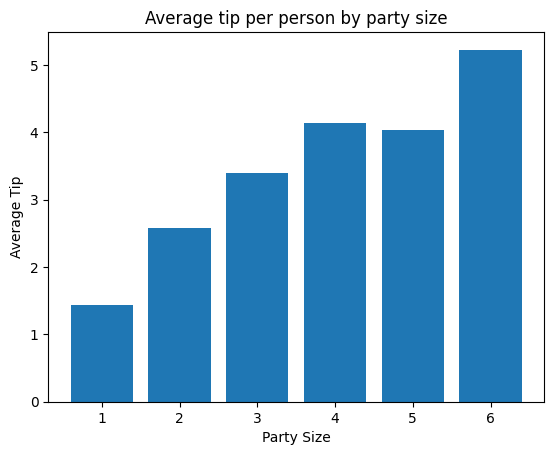

In [74]:
print("---------")
time_based_tips=tips.groupby('time',observed=True)['tip'].sum()
print("Are tips higher at dinner or lunch?\nTotal bill by time : "+""+str(time_based_tips))

print("---------")
print("Are bigger parties tipping more or less per person(party size vs per head tip)?")
party_size_tips=tips.groupby('size')['tip'].sum()
party_size_tips_count=tips.groupby('size')['size'].count()
party_size_tips_per_person=party_size_tips/party_size_tips_count
print(party_size_tips_per_person)
plt.bar(party_size_tips_per_person.index, party_size_tips_per_person.values)
plt.title("Average tip per person by party size")
plt.xlabel("Party Size")
plt.ylabel("Average Tip")
plt.show()


In [75]:
## If the restaurant wants to increase tips, which time of day, day, or customer type should they focus on?

time_based_tips=tips.groupby('time',observed=True)['tip'].sum()
print("Are tips higher at dinner or lunch?\nTotal bill by time : "+""+str(time_based_tips))
print("----------")
day_based_tips=tips.groupby('day',observed=True)['tip'].sum()
print("Are tips higher at which day?\nTotal bill by time : "+""+str(day_based_tips))


Are tips higher at dinner or lunch?
Total bill by time : time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64
----------
Are tips higher at which day?
Total bill by time : day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64


In [76]:
# Should the restaurant invest in lunch or dinner service to maximize tips?
time_based_tips=tips.groupby('time',observed=True)['tip'].sum()
print("Are tips higher at dinner or lunch?\nTotal bill by time : "+""+str(time_based_tips))

# Conclusion : I think we should invest in "Lunch" service to maximize tips as we already have dinner effect on tips.

Are tips higher at dinner or lunch?
Total bill by time : time
Lunch     185.51
Dinner    546.07
Name: tip, dtype: float64


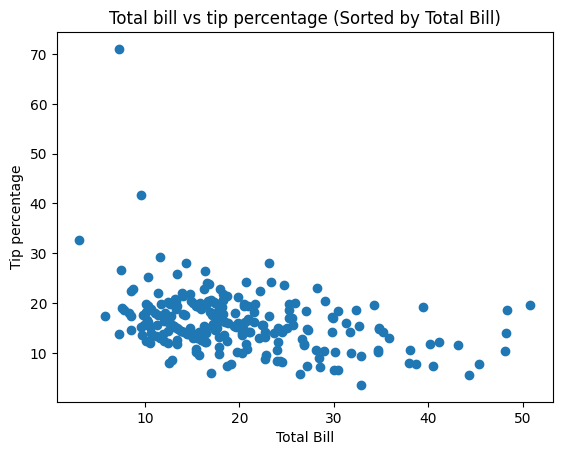

In [77]:
# Is there a correlation between bill size and tip percentage?
plt.scatter(tips['total_bill'], (tips['tip']*100)/tips['total_bill'])
plt.title("Total bill vs tip percentage (Sorted by Total Bill)")
plt.xlabel("Total Bill")
plt.ylabel("Tip percentage")
plt.show()
